## **Write down the code for Logistic Regression Training and Prediction** (20 points)

`It should work for any given data given features and class label

## **More details below**



In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import math
from numpy import *
import matplotlib.pyplot as plt 
import random

### **Iris Dataset (Sample Dataset)**
Popular classification dataset with 3 classes; setosa, virginica and versicolor.

We will choose 2 of the classes for the sample dataset

```
https://en.wikipedia.org/wiki/Iris_flower_data_set
```



In [26]:
iris_data = load_iris(return_X_y=False)

In [27]:
df_iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])

In [28]:
df_iris.shape

(150, 5)

In [29]:
# Let's choose two of the classes; 'setosa', 'versicolor'; class 0 and class 1
df_iris_sample = df_iris[df_iris["target"] != 2]
df_iris_sample["target"].unique()

array([0., 1.])

In [30]:
df_iris_sample.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [34]:
df_iris_sample = df_iris[df_iris["target"] != 0].copy()
df_iris_sample["target"].unique()
df_iris_sample.loc[df_iris_sample['target'] == 1.0,'target'] = 0.0
df_iris_sample.loc[df_iris_sample['target'] == 2.0,'target'] = 1.0

In [35]:
X = df_iris_sample[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].to_numpy()
y = df_iris_sample[['target']].to_numpy().ravel()

### dividing into training and testing with 70-30 ratio

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

## Your Logistic Regression Function from scratch (20 points)

You will write two main functions  one for training and one for prediction. 
Split data into test and training. Use training dataset to build model and measure the performance of your model on your test dataset. **(3 points)**

### **(A) Training** **(15 points)**

```
def logistic_regression_training(X, y, max_iter=1000, alpha=0.01, tol=1e-4):
  """ 
  Function to Train a Logistic Regression 

  Parameters: 
  X: numpy.ndarray of shape (n_samples, n_features)
      Training vector, where n_samples is the number of samples and n_features is the number of features.
  y: numpy.ndarray (n_samples,)
      Target vector relative to X.
  max_iter: int, default=100 
      Maximum number of iterations taken to converge.
  alpha: float, default=0.01
    Learning parameter
  tol: float, default=1e-4
  Returns: 
    numpy.ndarray of shape (n_features, 1)
    float
  """
```
  1. Initialize W and b to some random numbers (Anything other than 0.0)
  2. Repeat until convergence
  > 1. Use current w and b to compute predictions for all datapoints -> Forward Propagation** (5 points)
  > 2. Use predictions to compute current cost J(w, b) **-> Compute Cost Function (5 points)
  > 3. Adjust parameters w and b that can reduce cost --> BackPropagation + Gradient Descent (5 points)
  3. Return the weights for each of the input features + bias term
  ```
  return W, b
```


#### **Note:**

Make sure you can plot your iterations vs. training_error to see how gradient descent algorithm reduced the training error at each iteration


### **(B) Prediction** **(2 points)**
```
def logistic_regression_predict(x, W, b): 
    """ 
    Function to Predict using Logistic Regression 

    Parameters: 
    x: numpy.ndarray of shape (1, n_features)
        Vector for prediction, where n_features is the number of features.
    W: numpy.ndarray of shape (n_features, 1)
      Weights obtained from Logistic training
    b: float
      bias term
    Returns: 
     float
    """
  return prediction_probability
```


### Function to return the sigmoid of linear combination

In [37]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
    

### Function to Implement Back Propagation

In [38]:
def Back_propogation(predicted,actual,X):
    grad = predicted - actual
    dw = np.dot(X.T,grad)/X.shape[0]
    db = np.average(grad)
    return dw,db

### Function for determining the cost at each iteration

In [39]:
def cost_function(y,a):
    return -np.mean(y * np.log(a) + (1-y) * np.log(np.array(1) - a))

        

### Function for Update rule using gradient descent

In [40]:
def gradient_descent(w,b,X,predicted,actual,alpha):
    dw,db = Back_propogation(predicted,actual,X)
    w = w - alpha*dw
    b = b - alpha*db
    return w,b

### Function to train the logistic Regression model

In [41]:
def logistic_regression_training(X, y, max_iter=1000, alpha=0.01, tol=1e-4):
    random.seed(42)
    w = []
    cost = []
    b = np.random.uniform(0,1)
    d = 4
    for j in range(0,d):
        w.append(np.random.uniform(-0.01,0.01))
    for i in range(max_iter):
        pred = sigmoid(np.dot(w,X.T) + b)
        dw,db = Back_propogation(pred,y,X)
        if ((np.absolute(alpha * dw) <= tol).any() and (np.absolute(alpha *db) <= tol).any()):
            break
        cost.append(cost_function(y,pred))
        w,b = gradient_descent(w,b,X,pred,y,alpha)
    print("No of iterations to converge " + str(i))
    return w,b,cost
        
    
    

### Determining optimal weight and bias after training

In [42]:
W,B,cost = logistic_regression_training(x_train,y_train)
print("Weights :"+ str(W))
print("Bias :"+ str(B))

No of iterations to converge 999
Weights :[-0.7181594  -0.57206737  0.89113025  0.87025888]
Bias :0.5122409464404587


### Function for predicting the class labels

In [43]:
def logistic_regression_predict(x, W, b):
    linear = np.dot(W,x.T) + B
    y_pred = 1 / (1 + np.exp(-linear))
    for i in range(len(y_pred)):
        if (y_pred[i] < 0.5):
            y_pred[i] = 0
        else:
            y_pred[i] = 1
    return y_pred
   


### Function for determining the accuracy of the model

In [44]:
def model_accuracy(y_actual,y_pred):
    accuracy = sum(y_actual == y_pred)/len(y_pred)
    return accuracy*100

### calling of prediction and accuracy functions

In [45]:
y_pred = logistic_regression_predict(x_test,W,B)
accuracy = model_accuracy(y_test,y_pred)
print("Accuracy of the model is :" +str(accuracy) + "%")

accuracy of the model is :96.66666666666667%


### Plot of cost v/s no of iterations

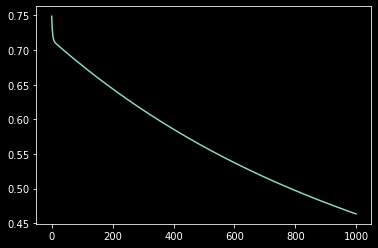

In [46]:
plt.plot(list(range(1000)),cost)